In [1]:
def map_x_with_data(x, data):
    print('x: ', x)
    print(data)
    return data.iloc[x]

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from math import *


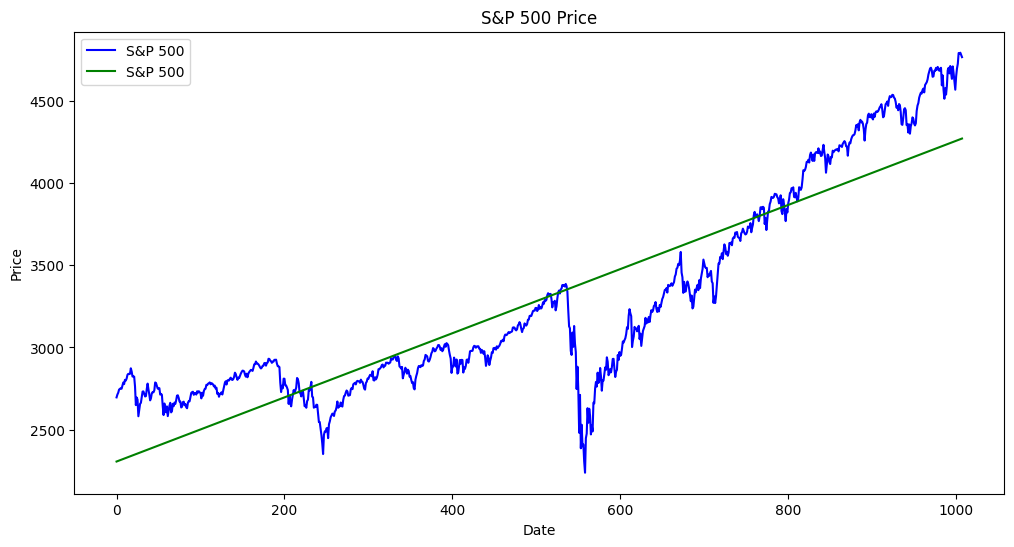

In [3]:
snpdata = pd.read_csv('S&P 500 Historical Data 2018 to 2022.csv')
snpdf = snpdata.set_index(pd.DatetimeIndex(snpdata['Date']))
x = np.array([i for i in reversed(range(len(snpdf['Price'])))])
snpdf['Price'] = snpdf['Price'].str.replace(',','').astype(float)
snpdf['Open'] = snpdf['Open'].str.replace(',','').astype(float)
snpdf['High'] = snpdf['High'].str.replace(',','').astype(float)
snpdf['Low'] = snpdf['Low'].str.replace(',','').astype(float)
plt.figure(figsize=(12, 6))
plt.plot(x, snpdf['Price'], color='blue', label='S&P 500')
plt.title('S&P 500 Price')
plt.xlabel('Date')
plt.ylabel('Price')


# Draw a straight line of best fit for S&P 500
# plt.figure(figsize=(12, 6))
x = np.array([i for i in reversed(range(len(snpdf['Price'])))])
# # convert the data to float
y = np.array(snpdf['Price'])
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='green', label='S&P 500')


plt.legend()
plt.show()

In [6]:

# calculate the differce between the line and the data 
# for S&P 500

# print(snpdf['Price'])

# let y be the data
# let x be the index

calculated_y = m*x + b

# find out the actual value vs the calculated value
# for S&P 500
difference = y - calculated_y

# convernt array to numpy array 
difference = np.array(difference.tolist())

# caluclate the confidence interval for the difference
# for S&P 500
diff_CI_mean = difference.mean()
diff_CI_std = difference.std()
diff_CI_n = len(difference)
# diff_CI_z = 1.96
diff_t_value = stats.t.ppf(1-0.05, diff_CI_n-1)
diff_CI_lower = diff_CI_mean - diff_t_value * diff_CI_std / sqrt(diff_CI_n)
diff_CI_upper = diff_CI_mean + diff_t_value * diff_CI_std / sqrt(diff_CI_n)
print('S&P 500 Difference Confidence Interval: ', diff_CI_lower, diff_CI_upper)





S&P 500 Difference Confidence Interval:  -15.017852962637269 15.01785296263599


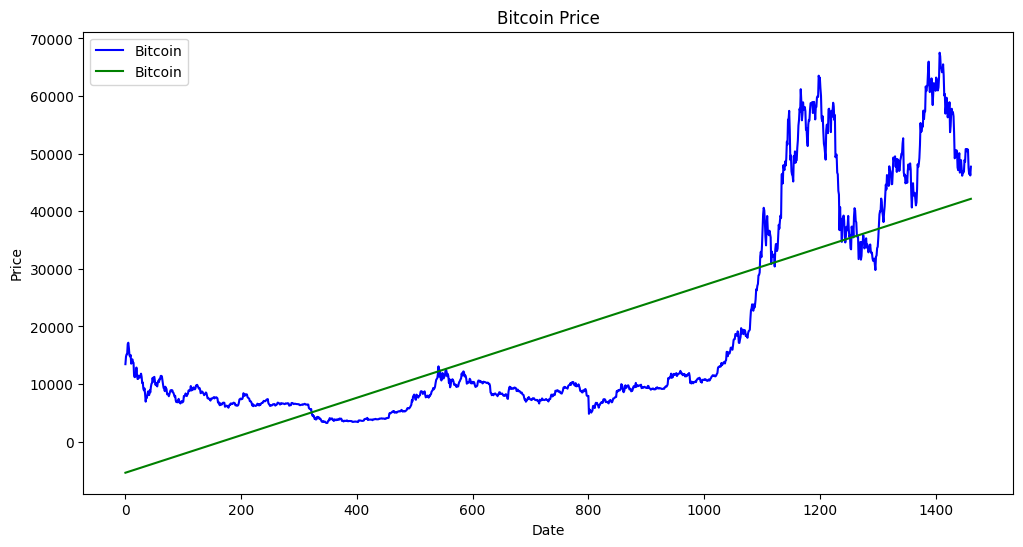

In [7]:
# Bitcoin
bitcoindata = pd.read_csv('Bitcoin Historical Data - Investing.com 2018 to 2022.csv')
bitcoindf = bitcoindata.set_index(pd.DatetimeIndex(bitcoindata['Date']))
x = np.array([i for i in reversed(range(len(bitcoindf['Price'])))])
bitcoindf['Price'] = bitcoindf['Price'].str.replace(',','').astype(float)
bitcoindf['Open'] = bitcoindf['Open'].str.replace(',','').astype(float)
bitcoindf['High'] = bitcoindf['High'].str.replace(',','').astype(float)
bitcoindf['Low'] = bitcoindf['Low'].str.replace(',','').astype(float)
plt.figure(figsize=(12, 6))
plt.plot(x, bitcoindf['Price'], color='blue', label='Bitcoin')
plt.title('Bitcoin Price')
plt.xlabel('Date')
plt.ylabel('Price')

# Draw a straight line of best fit for bitcoin
# plt.figure(figsize=(12, 6))
x = np.array([i for i in reversed(range(len(bitcoindf['Price'])))])
# # convert the data to float
y = np.array(bitcoindf['Price'])
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='green', label='Bitcoin')

plt.legend()
plt.show()



In [8]:
# calculate the differce between the line and the data 
# for Bitcoin

# print(bitcoindf['Price'])

# let y be the data
# let x be the index

calculated_y = m*x + b

# find out the actual value vs the calculated value

# for Bitcoin
difference = y - calculated_y

# convernt array to numpy array
difference = np.array(difference.tolist())

# caluclate the confidence interval for the difference
# for Bitcoin
diff_CI_mean = difference.mean()
diff_CI_std = difference.std()
diff_CI_n = len(difference)
# diff_CI_z = 1.96
diff_t_value = stats.t.ppf(1-0.05, diff_CI_n-1)
diff_CI_lower = diff_CI_mean - diff_t_value * diff_CI_std / sqrt(diff_CI_n)
diff_CI_upper = diff_CI_mean + diff_t_value * diff_CI_std / sqrt(diff_CI_n)
print('Bitcoin Difference Confidence Interval: ', diff_CI_lower, diff_CI_upper)


Bitcoin Difference Confidence Interval:  -484.3844321022497 484.38443210223505


So what does this means ? 

Bitcoin Difference Confidence Interval:  -484.3844321022497 484.38443210223505
S&P 500 Difference Confidence Interval:  -15.017852962637269 15.01785296263599

This means with a given regression line , we can be 95% confidence that the difference between the actual shock value verus the regression line will fall within the confidence interval 

...

